In [1]:
"""P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib"""





'P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. \n  Modeling wine preferences by data mining from physicochemical properties.\n  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.\n\n  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016\n                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf\n                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib'

In [58]:
# Importing the needed modules

import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

# Data Cleaning

In [3]:
# Read the data into a panda dataframe

reddf = pd.read_csv('winequality-red.csv') 

In [4]:
reddf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# View information of about the contents of the data

reddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Check out the first five contents of the the dataframe to get a sense of what it looks like

reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# adding a new output column into the dataset that shows whether the wine is good or not(1 or 0)
# quality value that is greater than 6.5 suggests that the wine is of good quality

def assign(x):
    if x < 6.5:
        return 0
    else:
        return 1
        

reddf['verdict'] = reddf['quality'].apply(assign)

In [8]:
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
reddf.shape

(1599, 13)

In [10]:
# checking the dataset distrubution

distinct = reddf.groupby('quality')
distinct.size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [11]:
status = reddf.groupby('verdict')
status.size()

verdict
0    1382
1     217
dtype: int64

In [12]:
# We have 1599 wine samples and 11 input features and one output feature
# The dataset is imbalanced which means we have an Imbalanced classification problem on our hands
# we have a single output column with more 2 target cardinality or variables so it is a Multiclass Classification problem
# figure out the next step of action
# Data Cleaning
# Check for the existense of null values

print(len(reddf))

reddf.isna().sum()

1599


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
verdict                 0
dtype: int64

# Data Exploration and Visualization

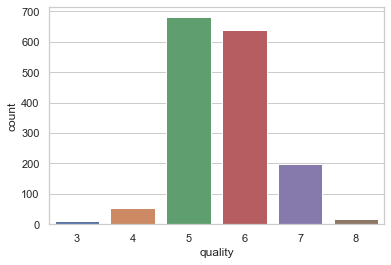

In [13]:
# plot a countplot
sns.set(style='whitegrid')
sns.countplot(reddf['quality'], label='Count')

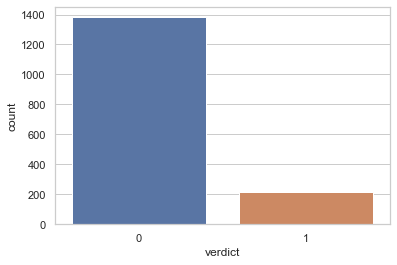

In [14]:
sns.set(style='whitegrid')
sns.countplot(reddf['verdict'], label='Count')

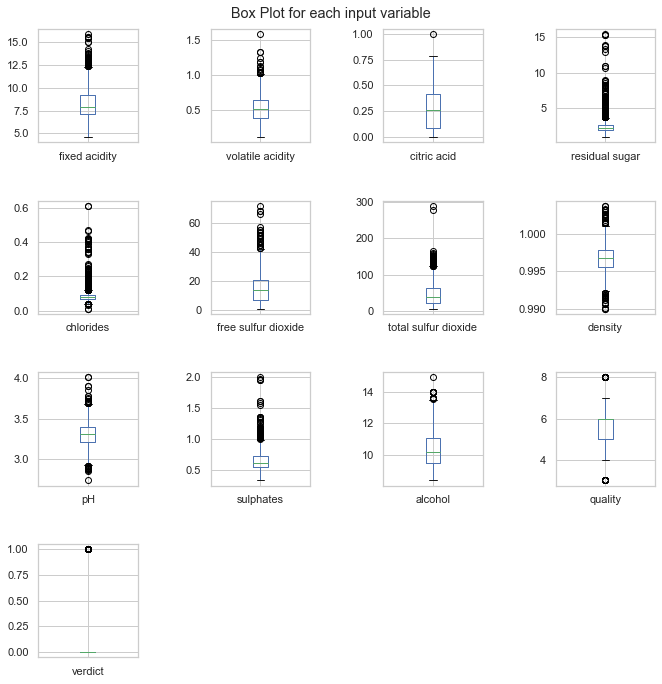

In [15]:
reddf.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey = False, figsize=(10,10),
           title= 'Box Plot for each input variable')
plt.savefig('Wine_box')
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)
plt.show()


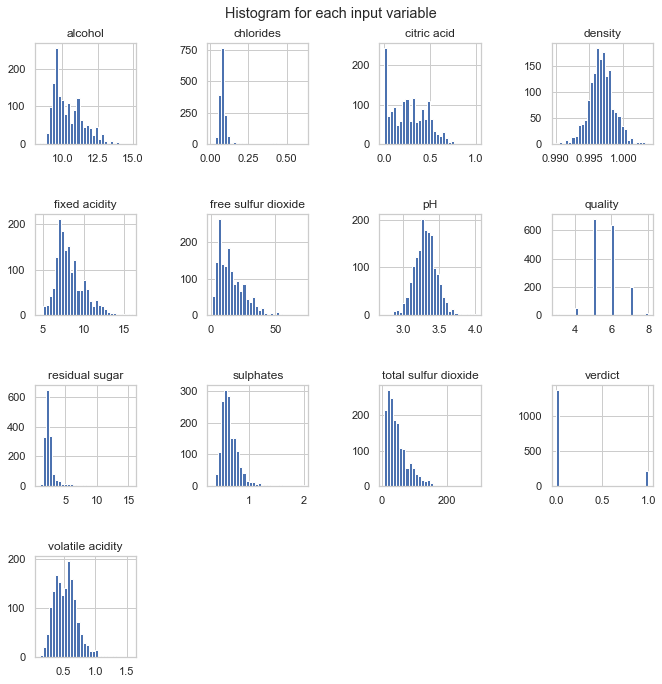

In [16]:
# histogram
reddf.hist(bins=30, figsize=(10,10))

pl.suptitle('Histogram for each input variable')
plt.savefig('Wine_hist')
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)
plt.show()

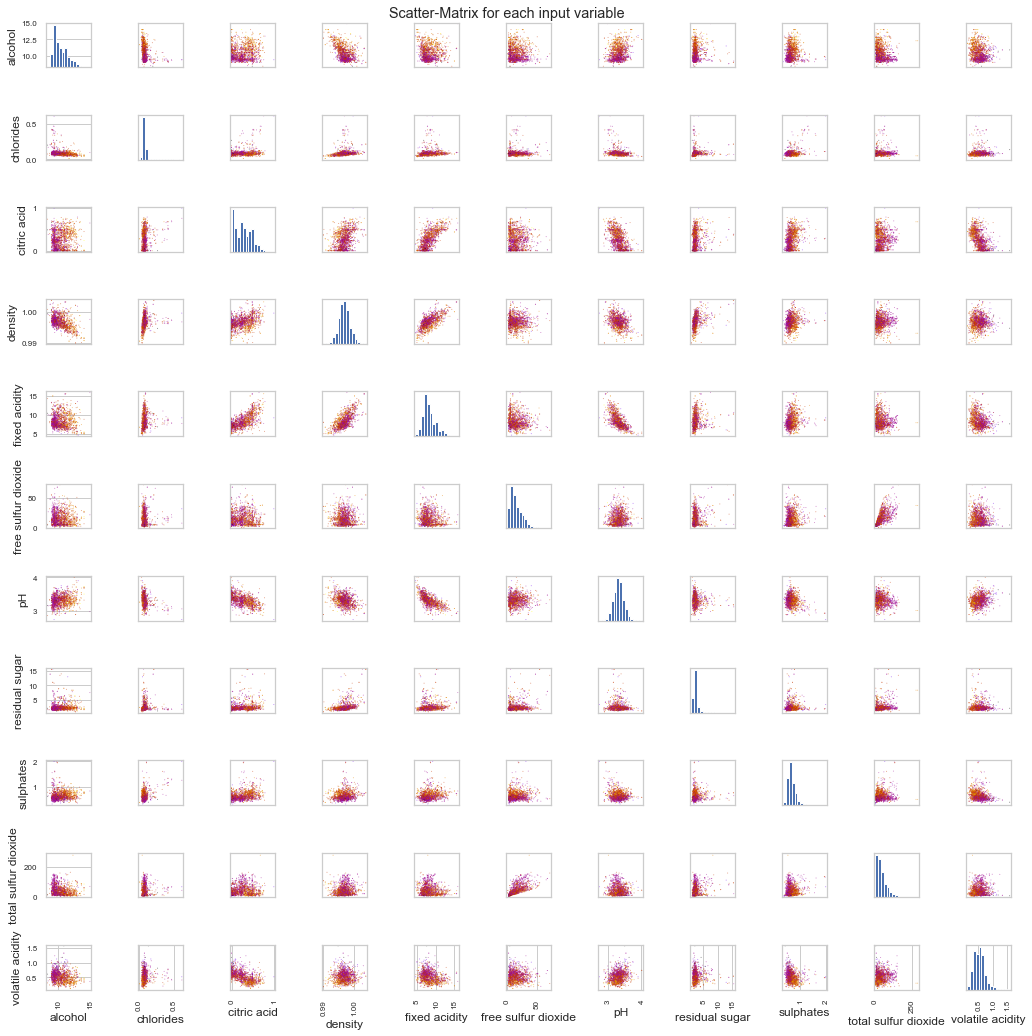

In [17]:
# From above we can see some correlations between features eg density and fixed acidity, alcohol and density
# Checking individual feature correlations
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide',
                 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']

X = reddf[feature_names]
Y = reddf['quality']

cmap = cm.get_cmap('gnuplot')

scatter_matrix(X, c=Y, marker='o', s=1, hist_kwds={'bins': 15}, figsize=(15, 15), cmap=cmap)
plt.suptitle('Scatter-Matrix for each input variable')
plt.tight_layout(pad=3.0)
plt.savefig('Wine_scatter_matrix')

In [18]:
# since data quality with the value of greater than 6.5 is good
# try to find patterns within the data set which we can identify as good

gooddata = reddf[reddf['quality'] >= 6.5]

In [19]:
gooddata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7,1


In [20]:
gooddata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [21]:
mid = list(gooddata.mean())
print(mid)

[8.84700460829493, 0.40552995391705077, 0.37649769585253456, 2.708755760368665, 0.07591244239631334, 13.981566820276498, 34.88940092165899, 0.9960302764976945, 3.2888018433179704, 0.7434562211981565, 11.518049155145922, 7.082949308755761, 1.0]


In [22]:
low = list(gooddata.min())

print(low)

[4.9, 0.12, 0.0, 1.2, 0.012, 3.0, 7.0, 0.99064, 2.88, 0.39, 9.2, 7.0, 1.0]


In [23]:
high = list(gooddata.max())
print(high)

[15.6, 0.915, 0.76, 8.9, 0.358, 54.0, 289.0, 1.0032, 3.78, 1.36, 14.0, 8.0, 1.0]


In [24]:
column = list(gooddata.mean().index)
data = [low, mid, high]

In [25]:
newdf = pd.DataFrame(data, columns=column)

In [26]:
newdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,4.900000,0.12000,0.000000,1.200000,0.012000,3.000000,7.000000,0.99064,2.880000,0.390000,9.200000,7.000000,1.0
1,8.847005,0.40553,0.376498,2.708756,0.075912,13.981567,34.889401,0.99603,3.288802,0.743456,11.518049,7.082949,1.0
2,15.600000,0.91500,0.760000,8.900000,0.358000,54.000000,289.000000,1.00320,3.780000,1.360000,14.000000,8.000000,1.0


In [27]:
olddf = pd.DataFrame(data= [list(reddf.min()), list(reddf.mean()), list(reddf.max())], columns= column)

olddf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.00000
1,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.13571
2,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.00000


In [28]:
middf = pd.DataFrame(data= [list(reddf.mean()), list(gooddata.mean())], columns= column)

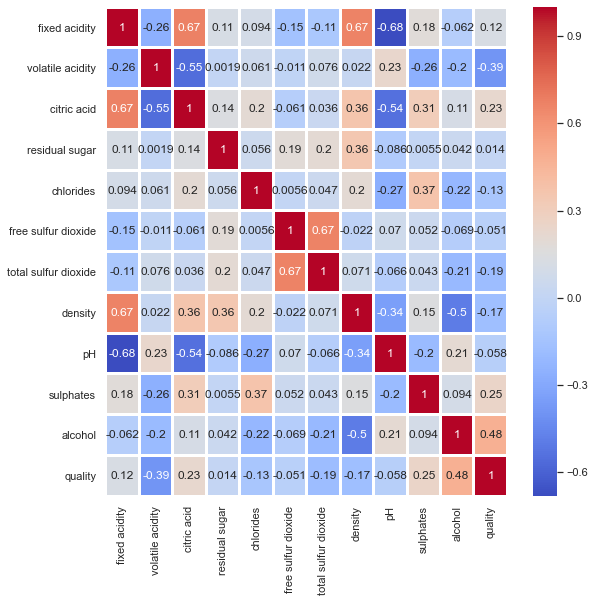

In [29]:
plt.figure(figsize = (9,9))
sns.heatmap(reddf.iloc[:, 0:12].corr(), linewidth=2, cmap='coolwarm',annot=True)

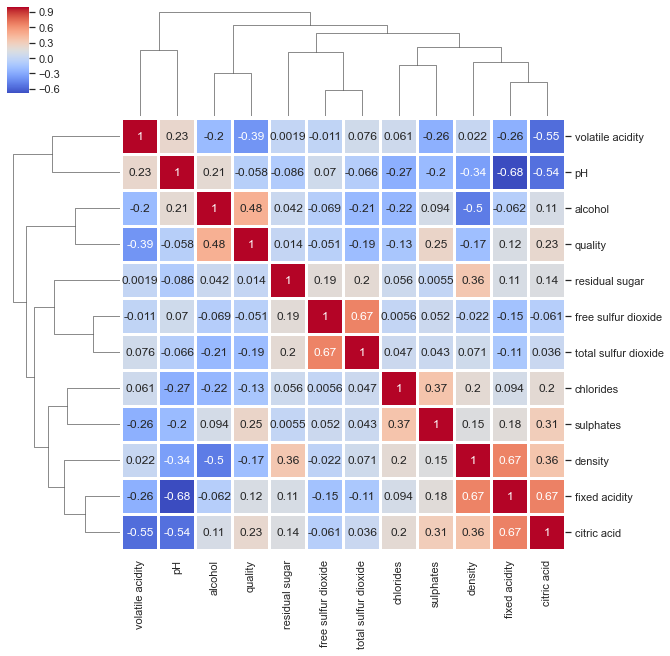

In [30]:
sns.clustermap(reddf.iloc[:, 0:12].corr(), linewidth=2, cmap='coolwarm', annot=True)

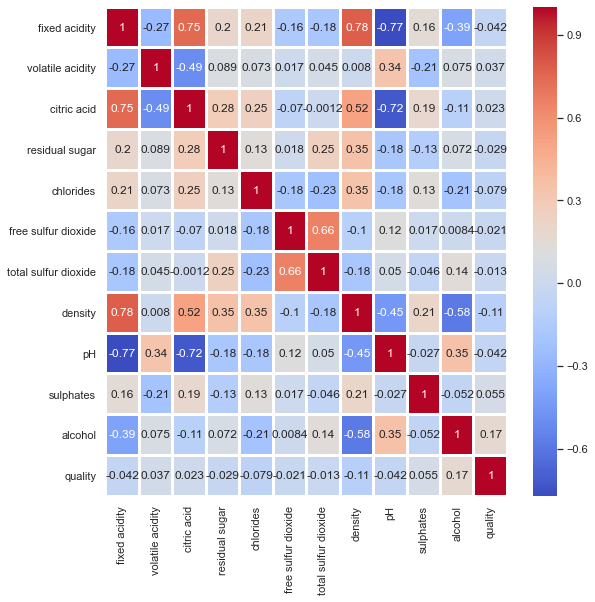

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(gooddata.iloc[:, 0:12].corr(),linewidth=2, cmap='coolwarm', annot=True )

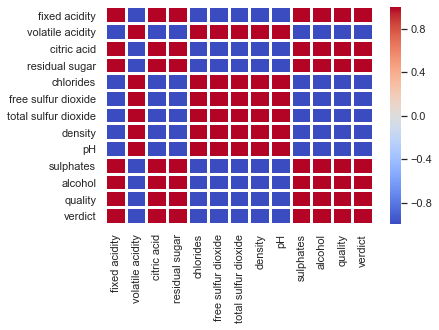

In [32]:
sns.heatmap(middf.corr(), linewidth=2, cmap='coolwarm',)

In [33]:
middf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.13571
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.00000


In [34]:
mergedf = pd.concat([newdf, olddf])
mergedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.00000
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.00000
2,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.00000
0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.00000
1,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.13571
2,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.00000


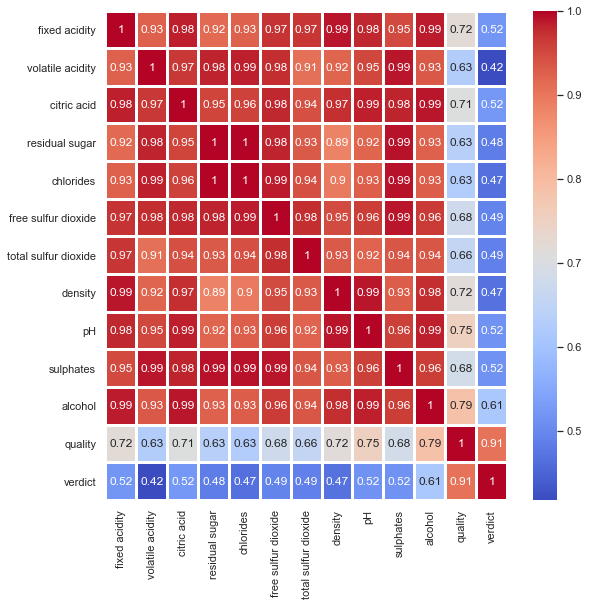

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(mergedf.corr(), linewidth=2, cmap='coolwarm', annot=True)

# Notes From Data Exploration and Visualisation

1) No obvious relationship between listed wine properties and their quality value

*Slight inverse relationship with quality: volatile acidity, *Minor: total suplhur dioxide, density.
    
*Slight direct relationship with quality: alcholol, *Minor: sulphates, citric acid.

most obvious relationship: alcohol(direct)

2) Classes are indeed ordered but unbalanced

greater than 75 percent of the tested samples had a quality value of 6 or less which is less than 6.5

3) No missing or Nan Values

4) All the columns contain only numerical data types

5) No negative values was present in any column
All the values in the data frames are all positive


# Data Preprocessing

In [36]:
# Examining the Projects purpose
# To determine which physicochemical properties make red wine 'good!' by using some machine learning techniques
# Our project falls under an imbalanced classifcation problem
# we would require a specialized sampling technique

In [37]:
reddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
verdict                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [67]:
# Preparing the data set

X = reddf.iloc[:, :-2].values
y = reddf.iloc[:, 11].values
z = reddf.iloc[:, 12].values

X.shape

(1599, 11)

In [39]:
# There are no missing data in the dataset
# There is no categorical data present in the dataset
# So the next thing for us to do is to split the dataset into training data and test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
X_train2, X_test2, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_train2.shape, z_train.shape)

(1279, 11) (1279,)
(1279, 11) (1279,)


In [40]:
# The dataset is imbalanced
# To solve this problem since the dataset is relatively small(1599 samples),
# we would employ oversampling to improve the model

# SMOTE Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')

X_train, y_train = smote.fit_sample(X_train, y_train)
X_train2, z_train = smote.fit_sample(X_train2, z_train)

print(X_train.shape, y_train.shape)
print(X_train2.shape, z_train.shape)

Using TensorFlow backend.


(1817, 11) (1817,)
(2184, 11) (2184,)


In [41]:
# Next we carry out Feature Scaling
# We need to put all columns values in the same scale to derive accurate result from our model
# The 2 types of feature scaling are standardisation and normalization,  we use standardization

scale_X = preprocessing.StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

scale_X2 = preprocessing.StandardScaler()
X_train2 = scale_X2.fit_transform(X_train2)
X_test2 = scale_X2.transform(X_test2)


print(X_train.shape, y_train.shape)
print(X_train2.shape, z_train.shape)

(1817, 11) (1817,)
(2184, 11) (2184,)


# Models

In [42]:
# our problem is a MultiClass classification problem with Imbalanced Dataset
# We would try to solve the problem using 5 different algorithms while observing the acurracy and the F1 scores
# These include
# Logistic regression
# Vector support machines
# K Nearest neighbour
# Random Forest
# Decision Trees

# note that we are focusing on evaluating feature importance not predicting an outcome

### Logistic Regression

In [43]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(max_iter=5000, C=1.2, class_weight=None, intercept_scaling=0.9)

lmodel.fit(X_train2, z_train)
pred = lmodel.predict(X_test2)
print('Logistic Regression Accuracy Score: ', accuracy_score(z_test, pred))
print('\nLogistic Regression F1 Score: ', f1_score(z_test, pred, average='weighted'))
print('\nLogistic Regression Confusion matrix: ', confusion_matrix(z_test, pred))
print('\nLogistic Regression Mean Absolute Error score: ', mean_absolute_error(z_test, pred))
print('\nLogistic Regression Classification Report: ', classification_report(z_test, pred))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, lmodel.coef_.T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))


Logistic Regression Accuracy Score:  0.74375

Logistic Regression F1 Score:  0.7954769148174661

Logistic Regression Confusion matrix:  [[213  77]
 [  5  25]]

Logistic Regression Mean Absolute Error score:  0.25625

Logistic Regression Classification Report:                precision    recall  f1-score   support

           0       0.98      0.73      0.84       290
           1       0.25      0.83      0.38        30

    accuracy                           0.74       320
   macro avg       0.61      0.78      0.61       320
weighted avg       0.91      0.74      0.80       320

                 Feature  Importance
10               alcohol    1.233306
9              sulphates    0.716527
0          fixed acidity    0.477311
3         residual sugar    0.351315
5    free sulfur dioxide    0.146895
8                     pH    0.064564
2            citric acid   -0.005589
4              chlorides   -0.304851
7                density   -0.441957
6   total sulfur dioxide   -0.498627
1    

Text(0.5, 1.0, 'Confusion matrix')

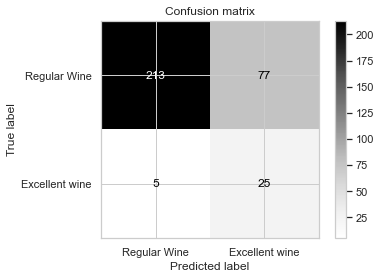

In [114]:
# Plotting Confusion Matric
plot1 = plot_confusion_matrix(lmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot1.ax_.set_title('Confusion matrix')

In [61]:
reddf.columns[12]

'verdict'

In [44]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lmodelx = LogisticRegression(max_iter=5000)

lmodelx.fit(X_train, y_train)
predx = lmodelx.predict(X_test)
print('Logistic Regression Accuracy Score: ', accuracy_score(y_test, predx))
print('\nLogistic Regression F1 Score: ', f1_score(y_test, predx, average='weighted'))
print('\nLogistic Regression Confusion matrix: ', confusion_matrix(y_test, predx))
print('\nLogistic Regression Mean Absolute Error score: ', mean_absolute_error(y_test, predx))
print('\nLogistic Regression Classification Report: ', classification_report(y_test, predx))

count = []
for x in lmodelx.coef_.T:
    y = sum(abs(x))
    count.append([y/6])
count = np.array(count)
print(count.shape)
feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, count)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))


Logistic Regression Accuracy Score:  0.590625

Logistic Regression F1 Score:  0.5901185280546792

Logistic Regression Confusion matrix:  [[ 1  0  1  0  0  0]
 [ 4  0  2  4  1  0]
 [10  0 94 30  1  0]
 [ 2  0 40 85 15  0]
 [ 1  0  1 16  9  0]
 [ 0  0  0  1  2  0]]

Logistic Regression Mean Absolute Error score:  0.49375

Logistic Regression Classification Report:                precision    recall  f1-score   support

           3       0.06      0.50      0.10         2
           4       0.00      0.00      0.00        11
           5       0.68      0.70      0.69       135
           6       0.62      0.60      0.61       142
           7       0.32      0.33      0.33        27
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.28      0.35      0.29       320
weighted avg       0.59      0.59      0.59       320

(11, 1)
                 Feature  Importance
1       volatile acidity    1.283764
6   total

Text(0.5, 1.0, 'Confusion matrix')

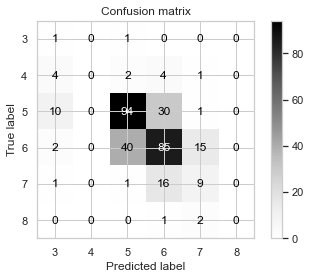

In [122]:
# Plotting Confusion Matric
plot2 = plot_confusion_matrix(lmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot2.ax_.set_title('Confusion matrix')


### Simple Vector Machine - Linear SVC

In [45]:
# Simple Vector Machine

from sklearn.svm import LinearSVC


svcmodel = LinearSVC(max_iter=50000, C=1.2, class_weight=None, intercept_scaling=0.9)

svcmodel.fit(X_train2, z_train)

pred2 = svcmodel.predict(X_test2)

print('Linear SVC Accuracy Score: ', accuracy_score(z_test, pred2))
print('\nLinear SVC F1 Score: ', f1_score(z_test, pred2, average='weighted'),)
print('\nLinear SVC Confusion matrix: ', confusion_matrix(z_test, pred2))
print('\nLinear SVC Mean Absolute Error score: ', mean_absolute_error(z_test, pred2))
print('\nLinear SVC Classification Report: ', classification_report(z_test, pred2))


feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, svcmodel.coef_.T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))

Linear SVC Accuracy Score:  0.728125

Linear SVC F1 Score:  0.7837183105745092

Linear SVC Confusion matrix:  [[208  82]
 [  5  25]]

Linear SVC Mean Absolute Error score:  0.271875

Linear SVC Classification Report:                precision    recall  f1-score   support

           0       0.98      0.72      0.83       290
           1       0.23      0.83      0.36        30

    accuracy                           0.73       320
   macro avg       0.61      0.78      0.60       320
weighted avg       0.91      0.73      0.78       320

                 Feature  Importance
10               alcohol    0.398268
9              sulphates    0.245465
0          fixed acidity    0.162471
3         residual sugar    0.111182
5    free sulfur dioxide    0.050094
2            citric acid    0.036875
8                     pH    0.022570
4              chlorides   -0.114490
6   total sulfur dioxide   -0.170498
7                density   -0.172908
1       volatile acidity   -0.242085


Text(0.5, 1.0, 'Confusion matrix')

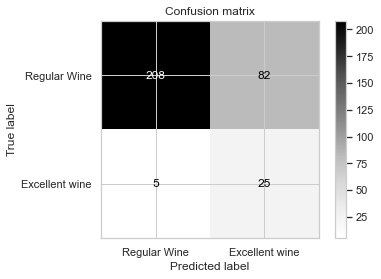

In [117]:
# Plotting Confusion Matric
plot3 = plot_confusion_matrix(svcmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot3.ax_.set_title('Confusion matrix')

In [46]:
# Simple Vector Machine

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


svcmodelx = LinearSVC(max_iter=50000, C=1.2, class_weight=None, intercept_scaling=0.9)

svcmodelx.fit(X_train, y_train)

pred2x = svcmodelx.predict(X_test2)

print('Linear SVC Accuracy Score: ', accuracy_score(y_test, pred2x))
print('\nLinear SVC F1 Score: ', f1_score(y_test, pred2x, average='weighted'),)
print('\nLinear SVC Confusion matrix: ', confusion_matrix(y_test, pred2x))
print('\nLinear SVC Mean Absolute Error score: ', mean_absolute_error(y_test, pred2x))
print('\nLinear SVC Classification Report: ', classification_report(y_test, pred2x))


count = []
for x in svcmodelx.coef_.T:
    y = sum(abs(x))
    count.append([y/6])
count = np.array(count)
print(count.shape)
feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, count)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))

Linear SVC Accuracy Score:  0.34375

Linear SVC F1 Score:  0.4035931692846876

Linear SVC Confusion matrix:  [[ 1  0  1  0  0  0]
 [ 7  0  3  1  0  0]
 [63  0 64  8  0  0]
 [50  0 43 45  4  0]
 [ 8  0  1 18  0  0]
 [ 0  0  1  1  1  0]]

Linear SVC Mean Absolute Error score:  1.259375

Linear SVC Classification Report:                precision    recall  f1-score   support

           3       0.01      0.50      0.02         2
           4       0.00      0.00      0.00        11
           5       0.57      0.47      0.52       135
           6       0.62      0.32      0.42       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.34       320
   macro avg       0.20      0.22      0.16       320
weighted avg       0.51      0.34      0.40       320

(11, 1)
                 Feature  Importance
6   total sulfur dioxide    0.383538
1       volatile acidity    0.360016
10               

Text(0.5, 1.0, 'Confusion matrix')

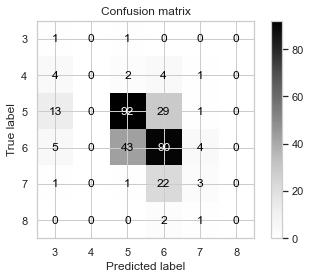

In [118]:
# Plotting Confusion Matric
plot4 = plot_confusion_matrix(svcmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot4.ax_.set_title('Confusion matrix')


### Simple Vector Machine - SVC

In [47]:
from sklearn.svm import SVC

svc_model = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')

svc_model.fit(X_train2, z_train)

pred9 = svc_model.predict(X_test2)

print('SVC Accuracy Score: ', accuracy_score(z_test, pred9))
print('\nSVC F1 Score: ', f1_score(z_test, pred9, average='weighted'),)
print('\nSVC Confusion matrix: ', confusion_matrix(z_test, pred9))
print('\nSVC Mean Absolute Error score: ', mean_absolute_error(z_test, pred9))
print('\nSVC Classification Report: ', classification_report(z_test, pred9))


SVC Accuracy Score:  0.925

SVC F1 Score:  0.925

SVC Confusion matrix:  [[278  12]
 [ 12  18]]

SVC Mean Absolute Error score:  0.075

SVC Classification Report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96       290
           1       0.60      0.60      0.60        30

    accuracy                           0.93       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.93      0.93      0.93       320



Text(0.5, 1.0, 'Confusion matrix')

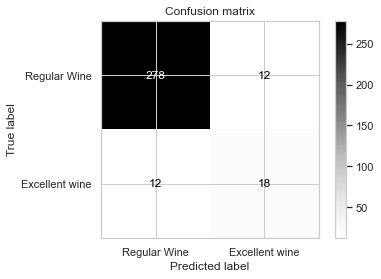

In [119]:
# Plotting Confusion Matric
plot5 = plot_confusion_matrix(svc_model, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot5.ax_.set_title('Confusion matrix')

In [48]:
svc_modelx = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='linear')

svc_modelx.fit(X_train, y_train)

pred9x = svc_modelx.predict(X_test)

print('SVC Accuracy Score: ', accuracy_score(y_test, pred9x))
print('\SVC F1 Score: ', f1_score(y_test, pred9x, average='weighted'),)
print('\SVC Confusion matrix: ', confusion_matrix(y_test, pred9x))
print('\nSVC Mean Absolute Error score: ', mean_absolute_error(y_test, pred9x))
print('\nSVC Classification Report: ', classification_report(y_test, pred9x))


count = []
for x in svc_modelx.coef_.T:
    y = sum(abs(x))
    count.append([y/6])
count = np.array(count)
print(count.shape)
feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, count)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))

SVC Accuracy Score:  0.584375
\SVC F1 Score:  0.5775279617961189
\SVC Confusion matrix:  [[  1   0   1   0   0   0]
 [  3   0   3   4   1   0]
 [  6   0 100  28   1   0]
 [  1   0  43  79  19   0]
 [  1   0   1  18   7   0]
 [  0   0   0   1   2   0]]

SVC Mean Absolute Error score:  0.48125

SVC Classification Report:                precision    recall  f1-score   support

           3       0.08      0.50      0.14         2
           4       0.00      0.00      0.00        11
           5       0.68      0.74      0.71       135
           6       0.61      0.56      0.58       142
           7       0.23      0.26      0.25        27
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.27      0.34      0.28       320
weighted avg       0.57      0.58      0.58       320

(11, 1)
                 Feature  Importance
1       volatile acidity    2.734422
6   total sulfur dioxide    1.991384
10              

Text(0.5, 1.0, 'Confusion matrix')

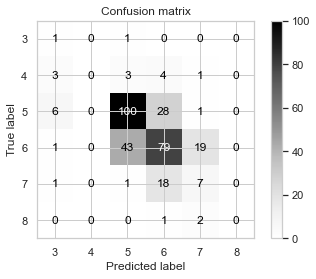

In [120]:
# Plotting Confusion Matric
plot6 = plot_confusion_matrix(svc_modelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot6.ax_.set_title('Confusion matrix')


### Random Forest Classifier

In [125]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators=100)

rfmodel.fit(X_train2, z_train)

pred3 = rfmodel.predict(X_test2)

print('Random Forest Classifier Accuracy Score: ', accuracy_score(z_test, pred3))
print('\nRandom Forest Classifier F1 Score: ', f1_score(z_test, pred3, average='weighted'),)
print('\nRandom Forest Classifier Confusion matrix: ', confusion_matrix(z_test, pred3))
print('\nRandom Forest Classifier Mean Absolute Error score: ', mean_absolute_error(z_test, pred3))
print('\nRandom Forest Classifier Classification Report: ', classification_report(z_test, pred3))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([rfmodel.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



Random Forest Classifier Accuracy Score:  0.88125

Random Forest Classifier F1 Score:  0.8956513360739982

Random Forest Classifier Confusion matrix:  [[259  31]
 [  7  23]]

Random Forest Classifier Mean Absolute Error score:  0.11875

Random Forest Classifier Classification Report:                precision    recall  f1-score   support

           0       0.97      0.89      0.93       290
           1       0.43      0.77      0.55        30

    accuracy                           0.88       320
   macro avg       0.70      0.83      0.74       320
weighted avg       0.92      0.88      0.90       320

                 Feature  Importance
10               alcohol    0.256022
9              sulphates    0.152030
1       volatile acidity    0.134273
6   total sulfur dioxide    0.076436
2            citric acid    0.070298
7                density    0.064621
0          fixed acidity    0.056419
4              chlorides    0.051970
5    free sulfur dioxide    0.048024
3         residua

Text(0.5, 1.0, 'Confusion matrix')

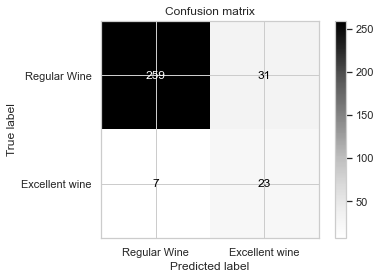

In [127]:
# Plotting Confusion Matric
plot7 = plot_confusion_matrix(rfmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot7.ax_.set_title('Confusion matrix')

In [53]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfmodelx = RandomForestClassifier(n_estimators=100)

rfmodelx.fit(X_train, y_train)

pred3x = rfmodelx.predict(X_test)

print('Random Forest Classifier Accuracy Score: ', accuracy_score(y_test, pred3x))
print('\nRandom Forest Classifier F1 Score: ', f1_score(y_test, pred3x, average='weighted'))
print('\nRandom Forest Classifier Confusion matrix: ', confusion_matrix(y_test, pred3x))
print('\nRandom Forest Classifier Mean Absolute Error score: ', mean_absolute_error(y_test, pred3x))
print('\nRandom Forest Classifier Classification Report: ', classification_report(y_test, pred3x))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([rfmodelx.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



Random Forest Classifier Accuracy Score:  0.73125

Random Forest Classifier F1 Score:  0.7179787386153447

Random Forest Classifier Confusion matrix:  [[  0   0   0   2   0   0]
 [  0   0   6   5   0   0]
 [  2   0 112  20   1   0]
 [  0   0  28 105   9   0]
 [  1   0   0   7  17   2]
 [  0   0   0   1   2   0]]

Random Forest Classifier Mean Absolute Error score:  0.31875

Random Forest Classifier Classification Report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.83      0.80       135
           6       0.75      0.74      0.74       142
           7       0.59      0.63      0.61        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.35      0.37      0.36       320
weighted avg       0.71      0.73      0.72       320

                 Feature  Impor

Text(0.5, 1.0, 'Confusion matrix')

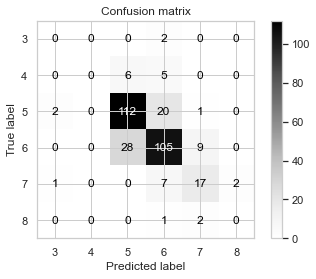

In [128]:
# Plotting Confusion Matric
plot8 = plot_confusion_matrix(rfmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot8.ax_.set_title('Confusion matrix')


### Decision Tree

In [54]:
# Decision  Tree

from sklearn.tree import DecisionTreeClassifier

trmodel = DecisionTreeClassifier(class_weight='balanced')

trmodel.fit(X_train2, z_train)

pred5 = trmodel.predict(X_test2)

print('DecisionTreeClassifier Accuracy Score: ', accuracy_score(z_test, pred5))
print('\nDecisionTreeClassifier F1 Score: ', f1_score(z_test, pred5, average='micro'))
print('\nDecisionTreeClassifier Confusion matrix: ', confusion_matrix(z_test, pred5))
print('\nnDecisionTreeClassifier Mean Absolute Error score: ', mean_absolute_error(z_test, pred5))
print('\nDecisionTreeClassifier Classification Report: ', classification_report(z_test, pred5))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([trmodel.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



DecisionTreeClassifier Accuracy Score:  0.875

DecisionTreeClassifier F1 Score:  0.875

DecisionTreeClassifier Confusion matrix:  [[257  33]
 [  7  23]]

nDecisionTreeClassifier Mean Absolute Error score:  0.125

DecisionTreeClassifier Classification Report:                precision    recall  f1-score   support

           0       0.97      0.89      0.93       290
           1       0.41      0.77      0.53        30

    accuracy                           0.88       320
   macro avg       0.69      0.83      0.73       320
weighted avg       0.92      0.88      0.89       320

                 Feature  Importance
10               alcohol    0.420870
1       volatile acidity    0.111216
9              sulphates    0.101533
8                     pH    0.066179
0          fixed acidity    0.057454
3         residual sugar    0.054929
5    free sulfur dioxide    0.046036
6   total sulfur dioxide    0.043502
2            citric acid    0.038283
7                density    0.030135
4     

Text(0.5, 1.0, 'Confusion matrix')

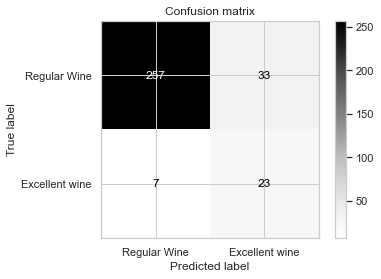

In [129]:
# Plotting Confusion Matric
plot9 = plot_confusion_matrix(trmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot9.ax_.set_title('Confusion matrix')

In [55]:
from sklearn.tree import DecisionTreeClassifier

trmodelx = DecisionTreeClassifier(class_weight='balanced')

trmodelx.fit(X_train, y_train)

pred5x = trmodelx.predict(X_test)

print('DecisionTreeClassifier Accuracy Score: ', accuracy_score(y_test, pred5x))
print('\nDecisionTreeClassifier F1 Score: ', f1_score(y_test, pred5x, average='micro'))
print('\nDecisionTreeClassifier Confusion matrix: ', confusion_matrix(y_test, pred5x))
print('\nnDecisionTreeClassifier Mean Absolute Error score: ', mean_absolute_error(y_test, pred5x))
print('\nDecisionTreeClassifier Classification Report: ', classification_report(y_test, pred5x))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([trmodelx.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



DecisionTreeClassifier Accuracy Score:  0.646875

DecisionTreeClassifier F1 Score:  0.646875

DecisionTreeClassifier Confusion matrix:  [[  0   0   0   2   0   0]
 [  0   2   7   2   0   0]
 [  0   1 101  30   3   0]
 [  1   1  32  92  13   3]
 [  0   0   5   8  12   2]
 [  0   0   0   1   2   0]]

nDecisionTreeClassifier Mean Absolute Error score:  0.41875

DecisionTreeClassifier Classification Report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.18      0.27        11
           5       0.70      0.75      0.72       135
           6       0.68      0.65      0.66       142
           7       0.40      0.44      0.42        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.38      0.34      0.35       320
weighted avg       0.65      0.65      0.64       320

                 Feature  Importance
10          

Text(0.5, 1.0, 'Confusion matrix')

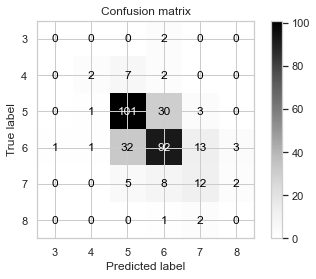

In [130]:
# Plotting Confusion Matric
plot10 = plot_confusion_matrix(trmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot10.ax_.set_title('Confusion matrix')


In [65]:
# From our models above, high values of Alcohol as well Low values of Volatile acidity end up giving substancial points towards
# that wine sample being classified as good
# are the 3 major determining factors of whether red wine is good or not
# There is an obvious connection between volatile acidity and fixed acidity

# if we did feature selection on our model, only 6 features would be choosen and 
# the accuracy results improvement on the model wont be substancial 

# Improving our models accuracy

In [77]:
# with GridSearch CV

# logistic Regression

from sklearn.model_selection import GridSearchCV

param = {'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'intercept_scaling': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'class_weight': [None, 'balanced']}

gridlr = GridSearchCV(lmodel, param_grid=param, cv=10)

gridlr.fit(X_train2, z_train)

gridlr.best_params_

{'C': 0.1,
 'class_weight': None,
 'intercept_scaling': 0.1,
 'solver': 'liblinear'}

In [97]:
# linear SVC

from sklearn.model_selection import GridSearchCV

param = {'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'intercept_scaling': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'class_weight': [None, 'balanced']}

gridlr = GridSearchCV(svcmodel, param_grid=param, cv=10)

gridlr.fit(X_train2, z_train)

gridlr.best_params_

{'C': 0.1, 'class_weight': None, 'intercept_scaling': 0.1}

In [98]:
# SVC

param = {'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'class_weight': [None, 'balanced']}

gridsvc = GridSearchCV(svc_model, param_grid=param, cv=10)

gridsvc.fit(X_train2, z_train)

gridsvc.best_params_

{'C': 0.9, 'class_weight': None, 'gamma': 0.9, 'kernel': 'rbf'}

In [129]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Decision Tree
dt_val = cross_val_score(estimator=trmodel, X=X_train2, y=z_train, cv=10)
print(dt_val.mean(), '\n')

# Random Forest Classifier
rf_val = cross_val_score(estimator=rfmodel, X=X_train2, y=z_train, cv=10)
print(rf_val.mean(), '\n')

# Simple Vector Machine - SVC
svc_val = cross_val_score(estimator=svc_model, X=X_train2, y=z_train, cv=10)
print(svc_val.mean(), '\n')

# Simple Vector Machine - Linear SVC
lsvc_val = cross_val_score(estimator=svcmodel, X=X_train2, y=z_train, cv=10)
print(lsvc_val.mean(), '\n')

# Logistic Regression
lr_val = cross_val_score(estimator=lmodel, X=X_train2, y=z_train, cv=10)
print(lr_val.mean())

0.894732101713376 

0.9336433329144149 

0.9670436931841984 

0.8232876712328767 

0.8228205772694903


In [126]:
# The simple Vector machine - SVC model had the best cross validation score for the first dataset followed by
# The random forest model
# The decision tree model
# The logistic regression model and the 
# The simple vector machine = Linear SVC model

In [125]:
# The simple Vector machine - SVC model had the best accuracy score followed by
# The random forest model
# The decision tree model
# The logistic regression model and the 
# The simple vector machine = Linear SVC model

In [56]:
# for the second dataset with the quality column being the output variable the random forest model performed best.


# Summary

After careful evaluation of the dataset, visual plots and machine learning models, the six most influential physiochemical features that makes red wine good fall within:

    - Alcohol Percentage     (9.2 - 14.9)
    - Volatile Acidity       (0.12 - 0.915)
    - Sulphates              (0.39 - 2.00)
    - Total Sulfur dioxide   (6.0- 289.0)
    - Citric Acid            (0.0 - 1.00)
    - Chlorides              (0.012 - 0.358)

PH, Residual Sugars, Density and Fixed Acidity all have a large range across board so it won't really be helpful in pinpointing whether a wine is good or not.


Free Sulphur Dioxide is a subset of total sulphur dioxide.
    

#    THE END